<a href="https://colab.research.google.com/github/MostaryKhatun/Thesis/blob/main/ML_Model_paper3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
import lightgbm as lgb
import shap
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/Standard_for_all_dataset.csv'
data = pd.read_csv(file_path)

# Define features and target
features = ['Age_week', 'Consumption_feed_g_per_bird_per_day',
            'Consumption_water_g_per_bird_per_day', 'Lighting_duration_production_hours_per_day',
            'Bodyweight_g']  # Include 'Vaccination' if needed for encoding
target = 'Production_%'

# Prepare the dataset
X = data[features]
y = data[target]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


step-by-step guide to applying all the machine learning models from the paper using the features in your dataset, training the models, and evaluating their performance (MAE, RMSE, MAPE). The models will include: Random Forest (RF), Multilayer Perceptron (MLP), Support Vector Regression (SVR), Least Squares Support Vector Machine (LSSVM), k-Nearest Neighbors (kNN), XGBoost, and LightGBM.

1. Setup Environment and Preprocessing

In [4]:
# Initialize models
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "SVR": SVR(kernel='rbf', C=1, epsilon=0.1),
    "k-Nearest Neighbors": KNeighborsRegressor(),
    "MLP": MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42),
    "XGBoost": xgb.XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42),
    "LightGBM": lgb.LGBMRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
}

# Dictionary to store evaluation results
results = {}

# Train each model and evaluate
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    # Calculate MAE, RMSE, and MAPE
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

    # Store results
    results[model_name] = {'MAE': mae, 'RMSE': rmse, 'MAPE': mape}
    print(f"{model_name}: MAE = {mae}, RMSE = {rmse}, MAPE = {mape}%")


Random Forest: MAE = 0.8238888888888884, RMSE = 2.3150797922413915, MAPE = 69.15496526876412%
SVR: MAE = 20.624212770284796, RMSE = 34.65451727522287, MAPE = inf%
k-Nearest Neighbors: MAE = 0.9000000000000001, RMSE = 2.1689731313329914, MAPE = 15.486049616884687%


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP: MAE = 3.839475586681639, RMSE = 5.102650981678452, MAPE = inf%
XGBoost: MAE = 1.3898368566814396, RMSE = 4.287877552412074, MAPE = inf%
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001153 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 53
[LightGBM] [Info] Number of data points in the train set: 72, number of used features: 3
[LightGBM] [Info] Start training from score 65.986111
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGB

2. Define and Train Models
We will define and train all seven models.

3. Hyperparameter Tuning (Optional)
To improve the model performance, we can perform hyperparameter tuning using Grid Search (demonstrated with Random Forest as an example):

In [5]:
# Example Grid Search for Random Forest
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train_scaled, y_train)

# Best parameters and score
print(f"Best parameters for Random Forest: {grid_search_rf.best_params_}")
print(f"Best score for Random Forest: {grid_search_rf.best_score_}")


Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best score for Random Forest: 0.994473845076647


4. Evaluate Model Performance (Results Table)
You can store the results of all models in a summary table and compare them:


In [6]:
# Convert results to DataFrame for comparison
results_df = pd.DataFrame(results).T
print(results_df)

# You can save this as a CSV to include in your paper
results_df.to_csv("model_comparison_results.csv")


                           MAE       RMSE       MAPE
Random Forest         0.823889   2.315080  69.154965
SVR                  20.624213  34.654517        inf
k-Nearest Neighbors   0.900000   2.168973  15.486050
MLP                   3.839476   5.102651        inf
XGBoost               1.389837   4.287878        inf
LightGBM             18.324608  29.384450        inf


5. Feature Importance using SHAP
Since XGBoost and LightGBM are tree-based models, we can visualize feature importance using SHAP:

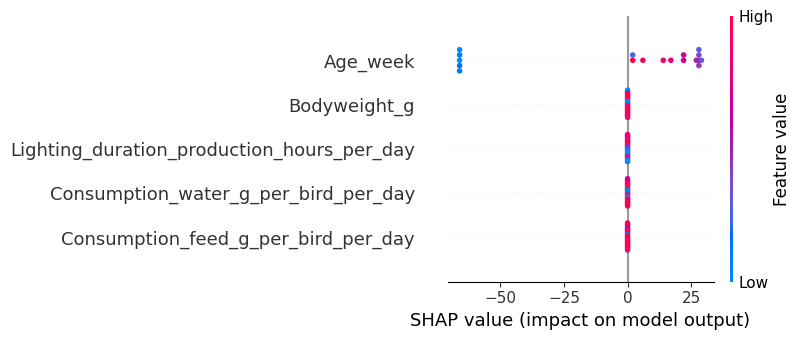

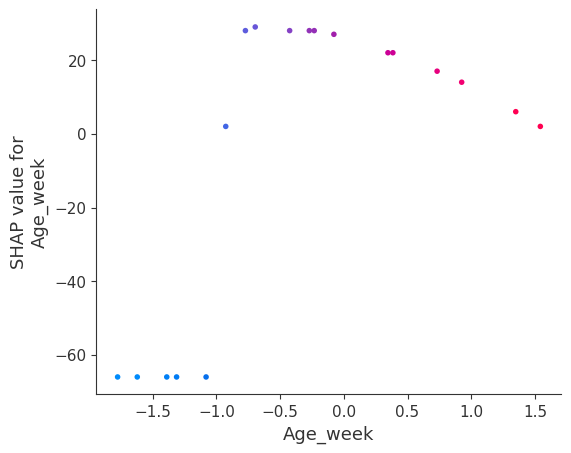

In [7]:
# SHAP analysis for XGBoost model
explainer_xgb = shap.TreeExplainer(models['XGBoost'])
shap_values_xgb = explainer_xgb.shap_values(X_test_scaled)

# SHAP Summary Plot
shap.summary_plot(shap_values_xgb, X_test_scaled, feature_names=features)

# SHAP Dependence Plot for 'Age_week'
shap.dependence_plot('Age_week', shap_values_xgb, X_test_scaled, feature_names=features)


6. Visualization of Model Performance
Create a visualization to compare the performance of all models:

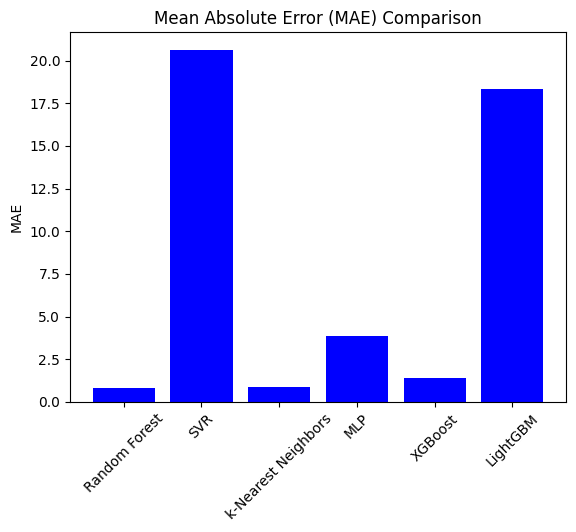

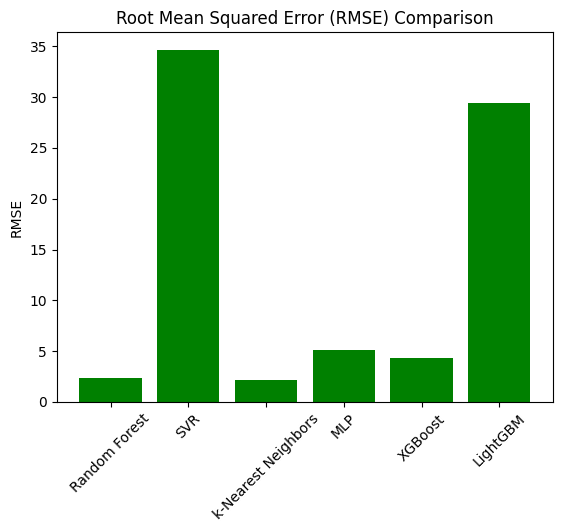

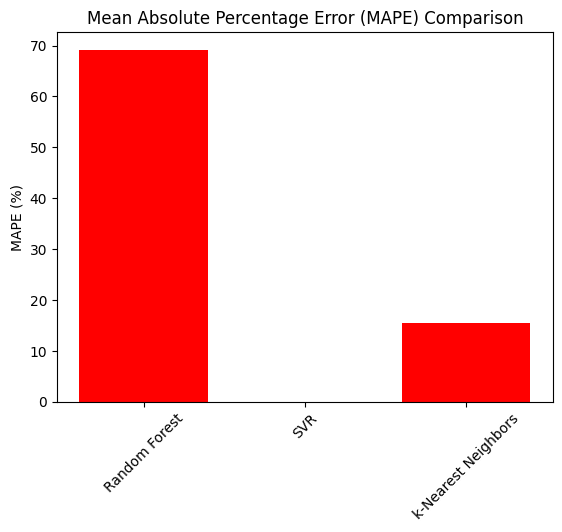

In [8]:
# Create bar plots to compare MAE, RMSE, and MAPE
import matplotlib.pyplot as plt

# Bar plot for MAE
plt.bar(results_df.index, results_df['MAE'], color='blue')
plt.title('Mean Absolute Error (MAE) Comparison')
plt.ylabel('MAE')
plt.xticks(rotation=45)
plt.show()

# Bar plot for RMSE
plt.bar(results_df.index, results_df['RMSE'], color='green')
plt.title('Root Mean Squared Error (RMSE) Comparison')
plt.ylabel('RMSE')
plt.xticks(rotation=45)
plt.show()

# Bar plot for MAPE
plt.bar(results_df.index, results_df['MAPE'], color='red')
plt.title('Mean Absolute Percentage Error (MAPE) Comparison')
plt.ylabel('MAPE (%)')
plt.xticks(rotation=45)
plt.show()
